![Astrofisica Computacional](../logo.png)

---
## 03. Logistic Regression Algorithm.


Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### About this notebook

In this worksheet, we implement a Logistic regression algorithm to classify a dataset.

---

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

### The data



In [2]:
X_train = pd.read_csv("TitanicData/train_X.csv", index_col=0)
y_train = pd.read_csv("TitanicData/train_Y.csv", index_col=0)
X_test = pd.read_csv("TitanicData/test_X.csv", index_col=0)
y_test = pd.read_csv("TitanicData/test_Y.csv", index_col=0)

In [3]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Id,,,,,,,
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


In [4]:
y_train.head()

,Survived
Id,
0,0
1,1
2,1
3,1
4,0


In [5]:
X_train = np.asarray(pd.read_csv("TitanicData/train_X.csv", index_col=0))
y_train = np.asarray(pd.read_csv("TitanicData/train_Y.csv", index_col=0))
X_test = np.asarray(pd.read_csv("TitanicData/test_X.csv", index_col=0))
y_test = np.asarray(pd.read_csv("TitanicData/test_Y.csv", index_col=0))

In [6]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (891, 7)
Shape of Y_train :  (891, 1)
Shape of X_test :  (418, 7)
Shape of Y_test :  (418, 1)


### Logistic Regression


For logistic regression (and binary classification) we use a fit function with the form

\begin{equation}
y_p (x;W,b) = \sigma (z(x;W,b)) 
\end{equation}

where $\sigma (z)$ represents the sigmoid (logistic) function,

\begin{equation}
\sigma (z) = \frac{1}{1+e^{-z}} 
\end{equation}

and $z(x;W,b) = Wx + b$. Therefore, we have

\begin{equation}
y_p (x;W,b) = \frac{1}{1+e^{-(Wx + b)}}. 
\end{equation}

Since the result of the regression will be a binary classification, with values 0 or 1, the cost function cannot have the form

\begin{equation}
f_{c} = \frac{1}{n} \sum_{i=1}^n \left( y_{p}(x_i) - y_i \right)^2.
\end{equation}

Instead, we will use a cost function defined as

\begin{equation}
f_{c} = - \frac{1}{n} \sum_{i=1}^n \left[ y_i \log(y_p) + (1-y_i)\log (1-y_p) \right].
\end{equation}

Note that, from this cost function, we conclude that:

- For a sigle sample with target value $y_i = 0$, the cost function reduces to $f_{c} = - \log (1-y_p)$. Note that a prediction near $y_p \sim 1$ gives a huge cost, $f_c \rightarrow \infty$, while a prediction near $y_p \sim y_0 = 0$ gives a low cost, $f_c \rightarrow 0$.

- For a sigle sample with target value $y_i = 1$, the cost function reduces to $f_{c} = - \log (y_p)$. This time, a prediction of $y_p \sim 0$ gives a huge cost, $f_c \rightarrow \infty$, while a prediction of $y_p \sim y_0 = 1$ gives a low cost, $f_c \rightarrow 0$.


The gradient of the cost function, w.r.t. the parameters $W$ and $b$ give
\begin{align}
\frac{ \partial f_{c}}{\partial W} = &- \frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{y_p} \frac{ \partial y_p}{\partial W} - \frac{1-y_i}{1-y_p} \frac{ \partial y_p}{\partial W} \right] \\ 
= &- \frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{y_p}  - \frac{1-y_i}{1-y_p}  \right]\left( y_p (1 -y_p) x_i \right) \\
= &- \frac{1}{n} \sum_{i=1}^n \left[ y_i(1 -y_p) - (1-y_i) y_p  \right] x_i\\
= &- \frac{1}{n} \sum_{i=1}^n \left[ y_i -  y_p  \right] x_i\\
= & \frac{1}{n} \sum_{i=1}^n \left[ y_p -  y_i  \right] x_i.
\end{align}

and 

\begin{align}
\frac{ \partial f_{c}}{\partial b} = &- \frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{y_p} \frac{ \partial y_p}{\partial b} - \frac{1-y_i}{1-y_p} \frac{ \partial y_p}{\partial b} \right] \\ 
= &- \frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{y_p}  - \frac{1-y_i}{1-y_p}  \right]\left( y_p (1 -y_p)\right) \\
= &- \frac{1}{n} \sum_{i=1}^n \left[ y_i(1 -y_p) - (1-y_i) y_p  \right] \\
= &- \frac{1}{n} \sum_{i=1}^n \left[ y_i -  y_p  \right] \\
= & \frac{1}{n} \sum_{i=1}^n \left[ y_p -  y_i  \right].
\end{align}


In [35]:
class LogisticRegression():
    '''
    Logistic regression class
    '''
    def __init__(self):
        pass
    
    def sigmoid(self, Z):
        return 1/(1 + np.exp(-Z))

    def Z(self, X):
        '''
        Function to fit
        '''
        return self.b + np.dot(X,self.W)
    
    def predict(self, X):
        return self.sigmoid(self.Z(X))
    
    def cost(self, X, y):
        '''
        Cost function
        '''
        Yp = self.predict(X)
        return -(1/self.n)*np.sum(y*np.log(Yp) + (1-y)*np.log(1-Yp))
    
    def grad_cost(self, X,y):
        '''
        Gradient of the cost function
        '''
        Yp = self.predict(X)
        grad_dW = (1/self.n)*np.dot(X.T, Yp-y)
        grad_db = (1/self.n)*np.sum(Yp-y)
        return grad_dW, grad_db
    
    def fit(self, X, y):
        '''
        Optimization function
        '''
        alpha= 0.002  # Learning rate
        tol = 1e-13    # Tolerance
        np.random.seed(413)
        self.m = X.shape[1] # Number of features
        self.n = X.shape[0] # Number od samples
        
        self.W = np.zeros([self.m,1])#np.random.rand(self.m)
        self.b = 0#np.random.rand(1)
        Y = self.sigmoid(self.Z(X))

        self.history = []
        self.history.append(self.cost(X, y))
        print('Initial cost = ', self.history[0])
        
        epoch = 0 # Epochs
        epsilon = 1
        while epsilon>tol and epoch<200000:
            # Gradient
            grad_dW, grad_db = self.grad_cost(X,y)

            self.W = self.W - alpha*grad_dW
            self.b = self.b - alpha*grad_db
            
            self.history.append(self.cost(X, y))
            epsilon = abs(self.history[epoch] - self.history[epoch+1])
            epoch +=1
        
        print('Final cost = ', self.history[-1])
        print('Number of epochs = ',epoch)
    
    def accuracy(self, X, y):
        Yp = self.predict(X)
        Yp = Yp > 0.5
        Yp = np.array(Yp, dtype = 'int64')
        acc = (1 - np.sum(abs(Yp - y))/len(y))*100
        print("Accuracy of the model is : ", round(acc, 2), "%")
        
    

In [36]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

W, b = lr.W, lr.b

print('\nThe optimized parameters are')
print('W = ',W)
print('b = ',b)

Initial cost =  0.6931471805599454
Final cost =  0.44482356011000806
Number of epochs =  200000

The optimized parameters are
W =  [[-0.96633465]
 [ 2.76276562]
 [-0.03164378]
 [-0.33249102]
 [-0.11435116]
 [ 0.00343123]
 [-0.11285891]]
b =  1.757999615723724


In [37]:
lr.accuracy(X_test, y_test)


Accuracy of the model is :  90.91 %


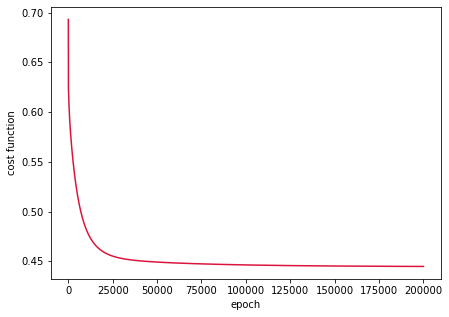

In [18]:
# Plot Training history

plt.figure(figsize=(7,5))
plt.plot(lr.history, color='crimson')
#plt.plot(lr.history[0:100], color='crimson')
plt.ylabel(r'cost function')
plt.xlabel(r'epoch')
plt.show()